# Project 04: Data Wrangling: WeRateDogs Tweets Archive

### Load required libraries

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline
from timeit import default_timer as timer

## Gather Data

### Gather data from twitter-archive-enhanced.csv

In [2]:
# load the csv file
data1 = pd.read_csv('twitter-archive-enhanced.csv')

### Gather data by download image_prediction.tsv using Requests library

In [3]:
# download file
#rq = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
#with open('image_prediction.tsv', mode = 'wb') as file:
#    file.write(rq.content)
# load the file to data2 dataframe
data2 = pd.read_csv('image_prediction.tsv', delimiter = '\t')

### Gather data from twitter API using Tweepy library

In [4]:
consumer_token = 'x'
consumer_secret = 'x'
access_token = 'x'
access_secret = 'x'

auth = tweepy.OAuthHandler(consumer_token, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [5]:
'''
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in data1.tweet_id.values:
        try:
            tweet = api.get_status(tweet_id, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
            json.dump(tweet._json, outfile)
            outfile.write('\n')

        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print('Fail retrieval {}'.format(len(fails_dict)))
'''

'\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in data1.tweet_id.values:\n        try:\n            tweet = api.get_status(tweet_id, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(\'Fail retrieval {}\'.format(len(fails_dict)))\n'

In [6]:
# Read txt file line by line and convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
data3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data

In [7]:
# take a look at data1
print(data1.info())
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


`data1` (Twitter archive) columns:
- **tweet_id**: unique id for each tweet
- **in_reply_to_status_id**: if the represented Tweet is a reply, this field will contain the original Tweet’s ID
- **in_reply_to_user_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- **timestamp**: time when this Tweet was created
- **source**: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- **text**: actual UTF-8 text of the status update
- **retweeted_status_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- **retweeted_status_user_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- **retweeted_status_timestamp**: time of retweet
- **expanded_urls**: tweet URL
- **rating_numerator**: numerator of the rating of a dog. Note: ratings almost always greater than 10
- **rating_denominator**: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- **name**: name of the dog
- **doggo**: one of the 4 dog "stage"
- **floofer**: one of the 4 dog "stage"
- **pupper**: one of the 4 dog "stage"
- **puppo**: one of the 4 dog "stage"

In [8]:
# Check if there are any records in data1 which are retweets
len(data1[data1.retweeted_status_id.isnull() == False])

181

In [9]:
# Sort by rating_denominator values
data1.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [10]:
# Sort by rating_numerator values
data1.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [11]:
data1.name.value_counts().sort_index(ascending=False)

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 957, dtype: int64

In [12]:
# Number of records whose both doggo and floofer columns are not None
len(data1[(data1.doggo != 'None') & (data1.floofer != 'None')])

1

In [13]:
# Number of records whose both doggo and pupper columns are not None
len(data1[(data1.doggo != 'None') & (data1.pupper != 'None')])

12

In [14]:
# Number of records whose both doggo and pupper columns are not None
len(data1[(data1.doggo != 'None') & (data1.puppo != 'None')])

1

In [15]:
# Number of records whose both floofer and pupper columns are not None
len(data1[(data1.floofer != 'None') & (data1.pupper != 'None')])

0

In [16]:
# Number of records whose both floofer and puppo columns are not None
len(data1[(data1.floofer != 'None') & (data1.puppo != 'None')])

0

In [17]:
# Number of records whose both pupper and puppo columns are not None
len(data1[(data1.pupper != 'None') & (data1.puppo != 'None')])

0

In [18]:
# take a look at data2
print(data2.info())
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


`data2` (tweet image predictions) columns:
- **tweet_id**: the unique identifier for each tweet
- **jpg_url**: dog's image URL
- **img_num**: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- **p1**: algorithm's #1 prediction for the image in the tweet
- **p1_conf**: how confident the algorithm is in its #1 prediction
- **p1_dog**: whether or not the #1 prediction is a breed of dog
- **p2**: algorithm's #2 prediction for the image in the tweet
- **p2_conf**: how confident the algorithm is in its #2 prediction
- **p2_dog**: whether or not the #2 prediction is a breed of dog
- **p3**: algorithm's #3 prediction for the image in the tweet
- **p3_conf**: how confident the algorithm is in its #3 prediction
- **p3_dog**: whether or not the #3 prediction is a breed of dog

In [19]:
# Check if there are any records in data1 whose corresponding record with same tweet_id is missing in data2 table
len(data1[~data1.tweet_id.isin(data2.tweet_id)])

281

In [20]:
# take a look at data3
print(data3.info())
data3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB
None


,tweet_id,retweet_count,favorite_count
0,892420643555336193,7722,36253
1,892177421306343426,5706,31266
2,891815181378084864,3782,23541
3,891689557279858688,7877,39551
4,891327558926688256,8494,37773


`data3` (tweet status) columns:
- **id**: the unique identifier for each tweet
- **retweet_count**: number of times this Tweet has been retweeted
- **favorite_count**: indicates approximately how many times this Tweet has been liked by Twitter users

### Quality

- In data1,the tweet_ID is not the right data type and value.
- Some wrong datatypes and values for in_reply_to_status_id, in_reply_to_user_id
- In data1, we only want original ratings (not the retweets).
- We only want ratings with images. Not all ratings have images.
- In data1, some ratings are wrong.
- In data1, some NOK datatype for timestamp
- In data1, nulls represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'.
- In data1, some dog names are not correct.
- In data2, some predictions are not dogs, there is no column for the most possible breed of a dog.

### Tidiness

- In data1, the columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful after removing retweets.
- In data1, the columns 'doggo', 'floofer', 'pupper','puppo' show one variable.
- data3 should be part of data1.
- rating_numerator and denominator should be one variable rating.

## Cleaning Data

In [21]:
# copy the 3 data to save the original
df1_clean = data1.copy()
df2_clean = data2.copy()
df3_clean = data3.copy()

### Issue 1: 
In data1, the columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful after removing retweets.

### Define: 
Remove all retweets and observations without ID, the remove columns: 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

### Code:

In [22]:
df1_clean = df1_clean[data1.tweet_id.notnull()]
df1_clean = df1_clean[data1.retweeted_status_id.isnull()]
df1_clean = df1_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis = 1)

### Test:

In [23]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 



### Issue 2: 
Rating without image must be removed

### Define:
Remove observation without images

### Code:

In [24]:
df2_clean.tweet_id = df2_clean.tweet_id.astype(str)
image_id = df2_clean[['tweet_id']].astype(int)
df1_clean = pd.merge(df1_clean, image_id, on = 'tweet_id')

### Test:

In [25]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  doggo                  1994 non-null   object 
 11  floofer                1994 non-null   object 
 12  pupper                 1994 non-null   object 
 13  puppo                  1994 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ 

### Issue 3:
4 Columns 'doggo', 'floofer', 'pupper', 'puppo' mean the same. No value represented as word 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'.
### Define:
Create column 'stage' to show dog stage, drop columns 'doggo','floofer','pupper','puppo'. Replace 'None' with np.nan.
### Code:

In [26]:
df1_clean.doggo = df1_clean.doggo.replace('None','')
df1_clean.floofer = df1_clean.floofer.replace('None','')
df1_clean.pupper = df1_clean.pupper.replace('None','')
df1_clean.puppo = df1_clean.puppo.replace('None','')
df1_clean['stage'] = df1_clean.doggo.str.cat(df1_clean.floofer).str.cat(df1_clean.pupper).str.cat(df1_clean.puppo)
df1_clean = df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis=1)
df1_clean.stage = df1_clean.stage.replace('',np.nan)

### Test:

In [27]:
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Issue 4:
data3 must be part of data1
### Define:
Merge content of data3 into data1, on tweet_id
### Code:

In [28]:
df3_clean = df3_clean[~(df3_clean.tweet_id.duplicated())].astype(int)
df1_clean = pd.merge(df1_clean,df3_clean,on = 'tweet_id',how = 'left')
df1_clean[df1_clean.tweet_id == '887473957103951883']
missingcount_id = df1_clean.tweet_id[df1_clean.retweet_count.isnull()]

/home/nttputus/Python3evns/dspy/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


### Test:

In [29]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  stage                  306 non-null    object 
 11  retweet_count          1987 non-null   float64
 12  favorite_count         1987 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 218.1+ KB


### Issue 5:
Missing retweet_count and favorite_count 
### Define:
Drop missing value
### Code:

In [30]:
df1_clean = df1_clean.dropna(subset=['retweet_count'])
df1_clean = df1_clean.dropna(subset=['favorite_count'])

### Test:

In [31]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1987 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1987 non-null   object 
 4   source                 1987 non-null   object 
 5   text                   1987 non-null   object 
 6   expanded_urls          1987 non-null   object 
 7   rating_numerator       1987 non-null   int64  
 8   rating_denominator     1987 non-null   int64  
 9   name                   1987 non-null   object 
 10  stage                  305 non-null    object 
 11  retweet_count          1987 non-null   float64
 12  favorite_count         1987 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 217.3+ KB


### Issue 6:
In data1, wrong datatype for timestamp
### Define:
Convert timestamp to datetime data type
### Code:

In [32]:
df1_clean.timestamp = pd.to_datetime(df1_clean.timestamp)

### Test:

In [33]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1987 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1987 non-null   datetime64[ns, UTC]
 4   source                 1987 non-null   object             
 5   text                   1987 non-null   object             
 6   expanded_urls          1987 non-null   object             
 7   rating_numerator       1987 non-null   int64              
 8   rating_denominator     1987 non-null   int64              
 9   name                   1987 non-null   object             
 10  stage                  305 non-null    object             
 11  retweet_count          1987 non-null   float64          

### Issue 7:
NOK  datatypes and values for in_reply_to_status_id, in_reply_to_user_id
### Define:
convert in_reply_to_status_id, in_reply_to_user_id to string data type.
### Code:

In [34]:
reply_id = df1_clean.tweet_id[df1_clean.in_reply_to_user_id.notnull()]
df1_clean.in_reply_to_user_id = df1_clean.in_reply_to_user_id.astype(str)
df1_clean.in_reply_to_status_id = df1_clean.in_reply_to_status_id.astype(str)
for each_id in reply_id:
    tweet_info = api.get_status(each_id,tweet_mode='extended')
    df1_clean.loc[df1_clean.tweet_id == each_id, 'in_reply_to_user_id']=str(tweet_info.in_reply_to_user_id)
    df1_clean.loc[df1_clean.tweet_id == each_id, 'in_reply_to_status_id']=str(tweet_info.in_reply_to_status_id)
df1_clean.in_reply_to_user_id = df1_clean.in_reply_to_user_id.replace('nan',np.nan)
df1_clean.in_reply_to_status_id = df1_clean.in_reply_to_status_id.replace('nan',np.nan)

### Test:

In [35]:
df1_clean.info()
df1_clean[df1_clean.in_reply_to_user_id.notnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1987 non-null   int64              
 1   in_reply_to_status_id  23 non-null     object             
 2   in_reply_to_user_id    23 non-null     object             
 3   timestamp              1987 non-null   datetime64[ns, UTC]
 4   source                 1987 non-null   object             
 5   text                   1987 non-null   object             
 6   expanded_urls          1987 non-null   object             
 7   rating_numerator       1987 non-null   int64              
 8   rating_denominator     1987 non-null   int64              
 9   name                   1987 non-null   object             
 10  stage                  305 non-null    object             
 11  retweet_count          1987 non-null   float64          

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
119,863079547188785154,667152164079423490,4196983835,2017-05-12 17:12:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,14,10,None,NaN,1048.0,8416.0
146,856526610513747968,855818117272018944,4196983835,2017-04-24 15:13:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://twitter.com/dog_rates/status/856526610...,14,10,None,NaN,1801.0,11517.0
192,844979544864018432,759099523532779520,4196983835,2017-03-23 18:29:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,https://twitter.com/dog_rates/status/844979544...,13,10,None,NaN,2533.0,13560.0
419,802265048156610565,733109485275860992,4196983835,2016-11-25 21:37:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,None,doggopupper,1411.0,6916.0
756,746906459439529985,746885919387574272,4196983835,2016-06-26 03:22:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,None,NaN,297.0,2899.0
758,746818907684614144,691416866452082688,4196983835,2016-06-25 21:34:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,https://twitter.com/dog_rates/status/746818907...,13,10,None,NaN,1742.0,5328.0
855,729838605770891264,729113531270991872,4196983835,2016-05-10 01:00:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",https://twitter.com/dog_rates/status/729838605...,12,10,None,NaN,381.0,1720.0
1035,705786532653883392,703255935813287936,4196983835,2016-03-04 16:06:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Seriously, add us 🐶 11/10 for sad wet pupper h...",https://twitter.com/dog_rates/status/705786532...,11,10,None,pupper,517.0,1930.0
1044,704871453724954624,667152164079423490,4196983835,2016-03-02 03:30:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,https://twitter.com/dog_rates/status/704871453...,12,10,None,NaN,1113.0,4263.0
1059,703425003149250560,703041949650034688,4196983835,2016-02-27 03:42:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Really guys? Again? I know this is a rare Alba...,https://twitter.com/dog_rates/status/703425003...,9,10,None,NaN,1358.0,3802.0


### Issue 8:
Issue with 'name' column: no value as 'None', some values are wrong, not capitalized name are wrong
### Define:
Set the value wrong names to 'None' and replace 'None' with np.nan.
### Code:

In [36]:
df1_clean.loc[df1_clean.name.str.islower(),'name'] = 'None'
df1_clean.name = df1_clean.name.replace('None',np.nan)

### Issue 9:
- In data1, some ratings are wrong.
- Rating_numerator and denominator should be one variable rating.

### Define:
- Change the rating_numerator and rating_denominator for oberservations with wrong value
- Drop row with not valid rating
- Create new column rating = rating_numerator/rating_denominator. Drop rating_numerator and rating_denominator.
- Drop oberservations with extreme ratings.
### Code:

In [37]:
pd.set_option('display.max_colwidth', -1)
df1_clean.loc[df1_clean.rating_denominator != 10,['tweet_id','text','rating_numerator','rating_denominator']]

/home/nttputus/Python3evns/dspy/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,tweet_id,text,rating_numerator,rating_denominator
323,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
385,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
662,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
800,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
848,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
891,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
925,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
946,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
970,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
988,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [38]:
df1_clean['rating'] = (((df1_clean.rating_numerator/df1_clean.rating_denominator)*10).astype(int))/10
df1_clean = df1_clean.drop(['rating_numerator','rating_denominator'],axis = 1)

df1_clean.loc[df1_clean.rating > 2,['tweet_id','text','rating']]

,tweet_id,text,rating
385,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,3.4
503,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.5
553,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.7
726,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.6
1374,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.6
1718,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.0


In [39]:
df1_clean=df1_clean[df1_clean.rating < 2]

### Test:

In [40]:
df1_clean.rating.sort_values()

756     0.0
235     0.0
1735    0.1
1900    0.1
1519    0.1
       ... 
49      1.4
549     1.4
571     1.4
634     1.4
362     1.4
Name: rating, Length: 1981, dtype: float64

### Issue 10:
In data2, some predictions are not dogs, there is no column for the most possible breed of a dog and the confidence.
### Define:
Create new columns `predicted_breed` and `predicted_conf` for the most possible breed of a dog and the confidence.
### Code:

In [42]:
df2_clean['predicted_breed'] = df2_clean.p1
df2_clean.predicted_breed[df2_clean.p1_dog == False] = df2_clean.p2
df2_clean.predicted_breed[(df2_clean.p1_dog == False) & (df2_clean.p2_dog == False)] = df2_clean.p3
df2_clean.predicted_breed[(df2_clean.p1_dog == False) & (df2_clean.p2_dog == False) & (df2_clean.p3_dog == False)] = 'None' 
df2_clean.predicted_breed=df2_clean.predicted_breed.replace('None',np.nan)
df2_clean.predicted_breed[:20]

/home/nttputus/Python3evns/dspy/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/nttputus/Python3evns/dspy/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nttputus/Python3evns/dspy/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

0     Welsh_springer_spaniel
1     redbone               
2     German_shepherd       
3     Rhodesian_ridgeback   
4     miniature_pinscher    
5     Bernese_mountain_dog  
6     NaN                   
7     chow                  
8     golden_retriever      
9     miniature_poodle      
10    golden_retriever      
11    Gordon_setter         
12    Walker_hound          
13    pug                   
14    bloodhound            
15    Lhasa                 
16    English_setter        
17    NaN                   
18    NaN                   
19    Italian_greyhound     
Name: predicted_breed, dtype: object

In [43]:
df2_clean['predicted_conf']=df2_clean.p1_conf
df2_clean.predicted_conf[df2_clean.p1_dog==False]=df2_clean.p2_conf
df2_clean.predicted_conf[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)]= df2_clean.p3_conf
df2_clean.predicted_conf[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)&(df2_clean.p3_dog==False)]=0 
df2_clean.predicted_conf=df2_clean.predicted_conf.replace(0,np.nan)
df2_clean.predicted_conf[:20]

/home/nttputus/Python3evns/dspy/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/nttputus/Python3evns/dspy/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nttputus/Python3evns/dspy/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

0     0.465074
1     0.506826
2     0.596461
3     0.408143
4     0.560311
5     0.651137
6    NaN      
7     0.692517
8     0.007959
9     0.201493
10    0.775930
11    0.503672
12    0.260857
13    0.489814
14    0.195217
15    0.582330
16    0.298617
17   NaN      
18   NaN      
19    0.176053
Name: predicted_conf, dtype: float64

### Test:

In [44]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1993
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1981 non-null   int64              
 1   in_reply_to_status_id  23 non-null     object             
 2   in_reply_to_user_id    23 non-null     object             
 3   timestamp              1981 non-null   datetime64[ns, UTC]
 4   source                 1981 non-null   object             
 5   text                   1981 non-null   object             
 6   expanded_urls          1981 non-null   object             
 7   name                   1339 non-null   object             
 8   stage                  304 non-null    object             
 9   retweet_count          1981 non-null   float64            
 10  favorite_count         1981 non-null   float64            
 11  rating                 1981 non-null   float64          

In [45]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   object 
 1   jpg_url          2075 non-null   object 
 2   img_num          2075 non-null   int64  
 3   p1               2075 non-null   object 
 4   p1_conf          2075 non-null   float64
 5   p1_dog           2075 non-null   bool   
 6   p2               2075 non-null   object 
 7   p2_conf          2075 non-null   float64
 8   p2_dog           2075 non-null   bool   
 9   p3               2075 non-null   object 
 10  p3_conf          2075 non-null   float64
 11  p3_dog           2075 non-null   bool   
 12  predicted_breed  1751 non-null   object 
 13  predicted_conf   1751 non-null   float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 184.5+ KB


## Store Data

Store the clean `df1_clean` in a CSV file named `twitter_archive_master.csv` and `df2_clean` in additional file `twitter_image_predictions.csv`.

In [46]:
df1_clean.to_csv('twitter_archive_master.csv', index=False)
df2_clean.to_csv('twitter_image_predictions.csv', index=False)

## Analyze & Visualize Data

In [47]:
df1_clean.describe()

,tweet_id,retweet_count,favorite_count,rating
count,1.981000e+03,1981.000000,1981.000000,1981.000000
mean,7.355944e+17,2457.172135,8281.034326,1.053508
std,6.742851e+16,4405.231579,12207.191552,0.219306
min,6.660209e+17,11.000000,72.000000,0.000000
25%,6.758209e+17,548.000000,1780.000000,1.000000
50%,7.081494e+17,1180.000000,3706.000000,1.100000
75%,7.873980e+17,2788.000000,10295.000000,1.200000
max,8.924206e+17,77957.000000,156437.000000,1.400000


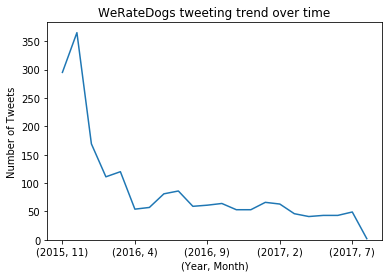

In [49]:
data = df1_clean.tweet_id.groupby([df1_clean["timestamp"].dt.year, df1_clean["timestamp"].dt.month]).count()
ax = data.plot(kind='line', title='Number of Tweets over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )

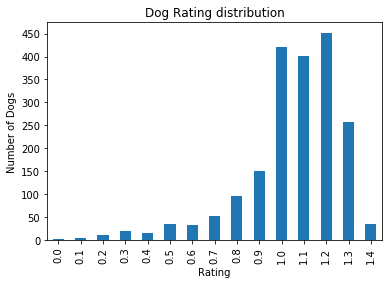

In [50]:
ax = df1_clean.rating.value_counts().sort_index().plot(kind='bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])

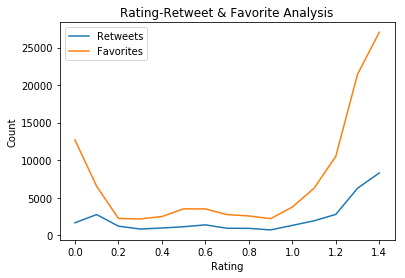

In [61]:
rating_analyze=pd.DataFrame(columns=['rating','retweet','favorite'])
rating_analyze['rating']=values
for x in rating_analyze['rating']:
    this_df=df1_clean[df1_clean.rating==x]
    rating_analyze.loc[rating_analyze.rating==x,'retweet']=this_df.retweet_count.mean()
    rating_analyze.loc[rating_analyze.rating==x,'favorite']=this_df.favorite_count.mean()
rating_analyze[['rating','retweet','favorite']].plot(x='rating',title='Rating-Retweet & Favorite Analysis')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.legend(('Retweets', 'Favorites'));

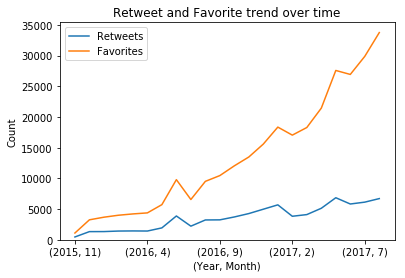

In [60]:
plt.subplots(1, sharex=True)
df1_clean.retweet_count.groupby([df1_clean["timestamp"].dt.year, df1_clean["timestamp"].dt.month]).mean().plot(kind='line')
df1_clean.favorite_count.groupby([df1_clean["timestamp"].dt.year, df1_clean["timestamp"].dt.month]).mean().plot(kind='line').set_ylim(0, )
plt.title('Retweet and Favorite trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'));

## Insights

- WeRateDogs tweeting trends is going down over time.
- Dogs rating distribution is over 1 (10/10) and most common rating is 1.2, 1.0 and 1.1. 
- However, `favorite` also raises for the dog rates really poor: ugly dog get some favorite also. As normal, high rating dogs have more favorites and more retweets.
- Despite the downtrend in number of tweets, retweet and favorite is still up for WeRateDogs.